# COVID-19 in Los Angeles County

Data courtesy Los Angeles County Department of Public Health.
The archived daily press releases can be found [here](http://publichealth.lacounty.gov/phcommon/public/media/mediaCOVIDdisplay.cfm?unit=media&ou=ph&prog=media)

The source code is hosted on GitHub at [amhirsch/gla_covid_19](https://github.com/amhirsch/gla_covid_19)

**Last Update:** Friday, June 5

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import gla_covid_19.analyze_lacph_daily as analyze_lacph_daily
import gla_covid_19.lacph_const as lacph_const
import gla_covid_19.lacph_prid as lacph_prid
import gla_covid_19.scrape_lacph_daily as scrape_lacph_daily

sns.set()

def adjust_ax(observations):
    min_date = observations[lacph_const.DATE].min()
    max_date = observations[lacph_const.DATE].max()
    plt.xlim((min_date, max_date))
    plt.xticks(pd.date_range(min_date, max_date, freq='SMS'), rotation=45)
    plt.show()

all_dates = tuple(map(lambda x: scrape_lacph_daily.query_single_date(x), lacph_prid.DAILY_STATS))

## Aggregate Statistics

In [2]:
summary_stats = analyze_lacph_daily.make_df_dates(all_dates)
summary_stats = pd.melt(summary_stats, id_vars='Date', var_name='Statistic', value_name='Count')
summary_stats['Statistic'] = summary_stats['Statistic'].astype('category')

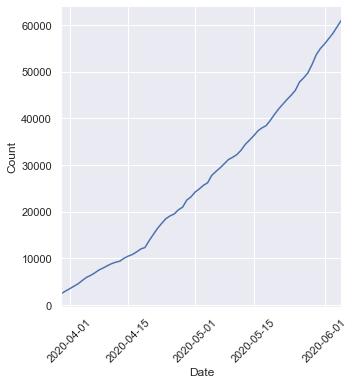

In [3]:
g = sns.relplot(x=lacph_const.DATE, y='Count', kind='line', data=summary_stats[summary_stats['Statistic'] == 'Cases'])
adjust_ax(summary_stats)

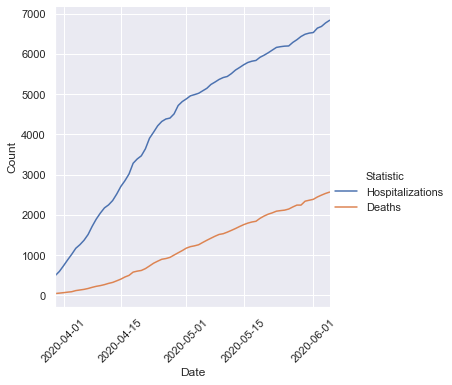

In [4]:
sns.relplot(x=lacph_const.DATE, y='Count', kind='line', hue='Statistic', data=summary_stats[summary_stats['Statistic'] != 'Cases'])
adjust_ax(summary_stats)

## Disaggregate Statistics

### Age Group

In [5]:
by_age = analyze_lacph_daily.make_by_age(all_dates)
by_age = pd.melt(by_age, id_vars='Date', var_name='Age Group', value_name='Cases')
# Remove seemingly erroneous data point
by_age = by_age[(by_age['Date'] != pd.Timestamp('2020-04-13')) | (by_age['Age Group'] != 'over 65')]

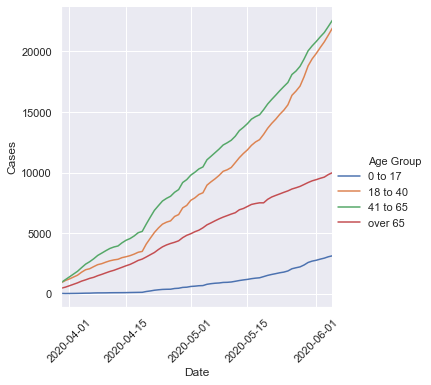

In [6]:
g = sns.relplot(x='Date', y='Cases', hue='Age Group', kind='line', data=by_age)
adjust_ax(by_age)

### Race / Ethnicity

In [7]:
by_race = analyze_lacph_daily.make_by_race(all_dates)
by_race = pd.melt(by_race, id_vars=(lacph_const.DATE, lacph_const.RACE), var_name='Statistic', value_name='Total')
by_race['Statistic'] = by_race['Statistic'].astype('category')

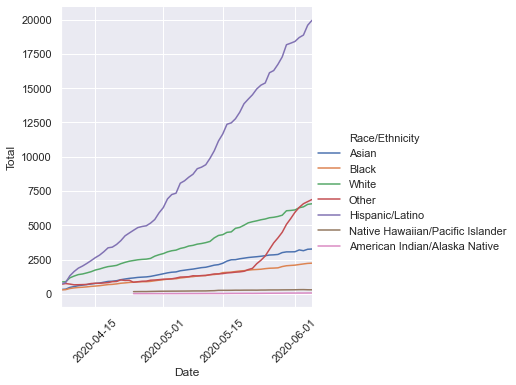

In [8]:
by_race_cases = by_race[by_race['Statistic'] == 'Cases']
sns.relplot(x=lacph_const.DATE, y='Total', hue=lacph_const.RACE, kind='line', data=by_race_cases)
adjust_ax(by_race_cases)

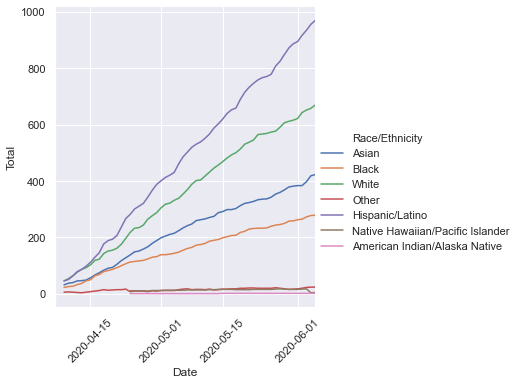

In [9]:
by_race_deaths = by_race[by_race['Statistic'] == 'Deaths']
sns.relplot(x=lacph_const.DATE, y='Total', hue=lacph_const.RACE, kind='line', data=by_race_deaths)
adjust_ax(by_race_deaths)

### Gender

In [14]:
by_gender = analyze_lacph_daily.make_by_gender(all_dates[10:])
by_gender = by_gender.melt(id_vars=('Date'), var_name='Gender', value_name='Cases')
by_gender['Gender'] = by_gender['Gender'].astype('category')
by_gender.head()

,Date,Gender,Cases
0,2020-04-09,Male,3792
1,2020-04-10,Male,4013
2,2020-04-11,Male,4216
3,2020-04-12,Male,4402
4,2020-04-13,Male,4508


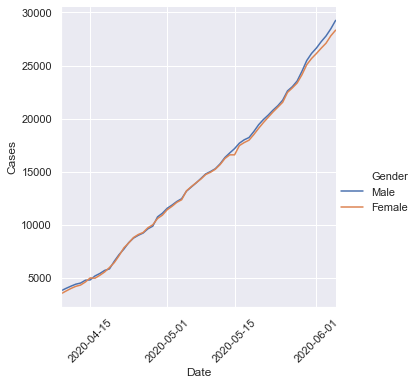

In [15]:
sns.relplot(x=lacph_const.DATE, y=lacph_const.CASES, hue=lacph_const.GENDER, kind='line', data=by_gender)
adjust_ax(by_gender)